<a href="https://colab.research.google.com/github/Bigsefy001/Bigsefy001-DNN-for-Digit-Recognition-MNIST-DATASET/blob/main/DNN_for_Digit_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.utils import to_categorical
from PIL import Image

In [ ]:
# Load the model
model = load_model('C:/Users/ttt/DL/three_layer.h5')
# Print the model architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,980 (234.30 KB)

 Trainable params: 59,594 (232.79 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 2 (12.00 B)

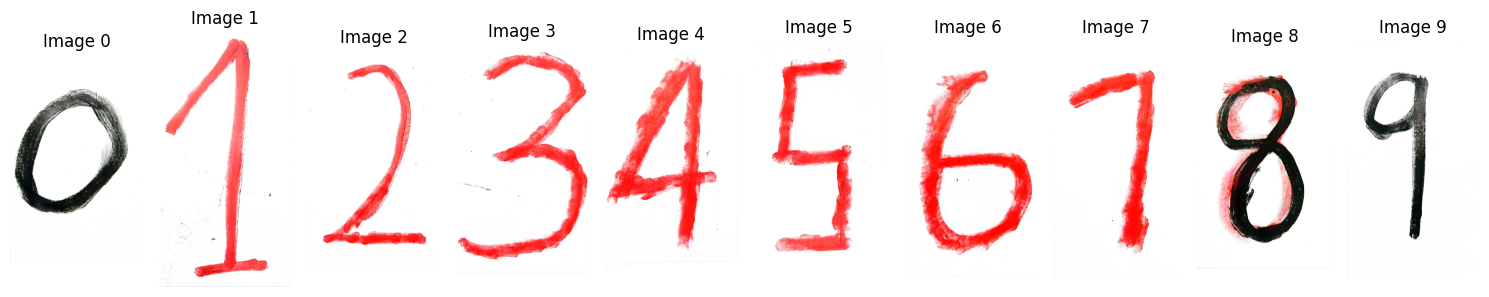

All images displayed before preprocessing.


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Display the original images
plt.figure(figsize=(15, 5))
for k in range(len(image_paths)):
    # Load the image using PIL
    img = Image.open(image_paths[k])

    # Add the image to the subplot
    plt.subplot(1, 10, k + 1)  # Adjust layout for up to 12 images
    plt.imshow(img, cmap='gray')  # Display in grayscale
    plt.axis('off')  # Turn off axis
    plt.title(f"Image {k}")

plt.tight_layout()
plt.show()

print("All images displayed before preprocessing.")


Shape of X_test (image data): (10, 28, 28)
Shape of y_test (labels): (10,)


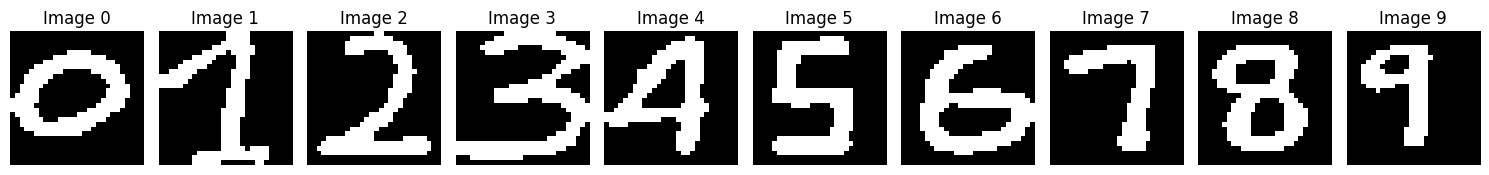

Preprocessed images displayed.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to preprocess an image for better accuracy
def preprocess_image(image_path):
    """
    Preprocess an individual image with advanced techniques.

    Args:
        image_path (str): Path to the image file.

    Returns:
        np.array: Preprocessed image.
    """
    # Step 1: Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError(f"Image not found: {image_path}")

    # Step 2: Resize the image to 28x28 pixels (standard input size)
    img_resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

    # Step 3: Denoising (Gaussian blur to reduce noise)
    img_denoised = cv2.GaussianBlur(img_resized, (5, 5), 0)

    # Step 4: Thresholding to separate the digit from the background
    # Using adaptive thresholding for better clarity of digit
    img_thresholded = cv2.adaptiveThreshold(img_denoised, 255,
                                           cv2.ADAPTIVE_THRESH_MEAN_C,
                                           cv2.THRESH_BINARY, 11, 2)

    # Step 5: Inverting the image (if needed for better contrast)
    img_inverted = cv2.bitwise_not(img_thresholded)

    # Step 6: Normalize the image to [0, 1] range
    img_normalized = img_inverted / 255.0

    return img_normalized

# Example image paths
image_paths = ['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg',
               '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']

# Apply preprocessing to all images
X_test = np.array([preprocess_image(path) for path in image_paths])

# Extract labels from the filenames (assuming they are named '0.jpg', '1.jpg', etc.)
y_test = np.array([int(path.split('.')[0]) for path in image_paths])

# Print shapes of images and labels
print(f"Shape of X_test (image data): {X_test.shape}")
print(f"Shape of y_test (labels): {y_test.shape}")

# Display the preprocessed images to verify
plt.figure(figsize=(15, 5))
for k, img in enumerate(X_test):
    plt.subplot(1, 10, k + 1)  # Arrange in a single row
    plt.imshow(img.squeeze(), cmap='gray')  # Display preprocessed images
    plt.axis('off')
    plt.title(f"Image {k}")
plt.tight_layout()
plt.show()

print("Preprocessed images displayed.")


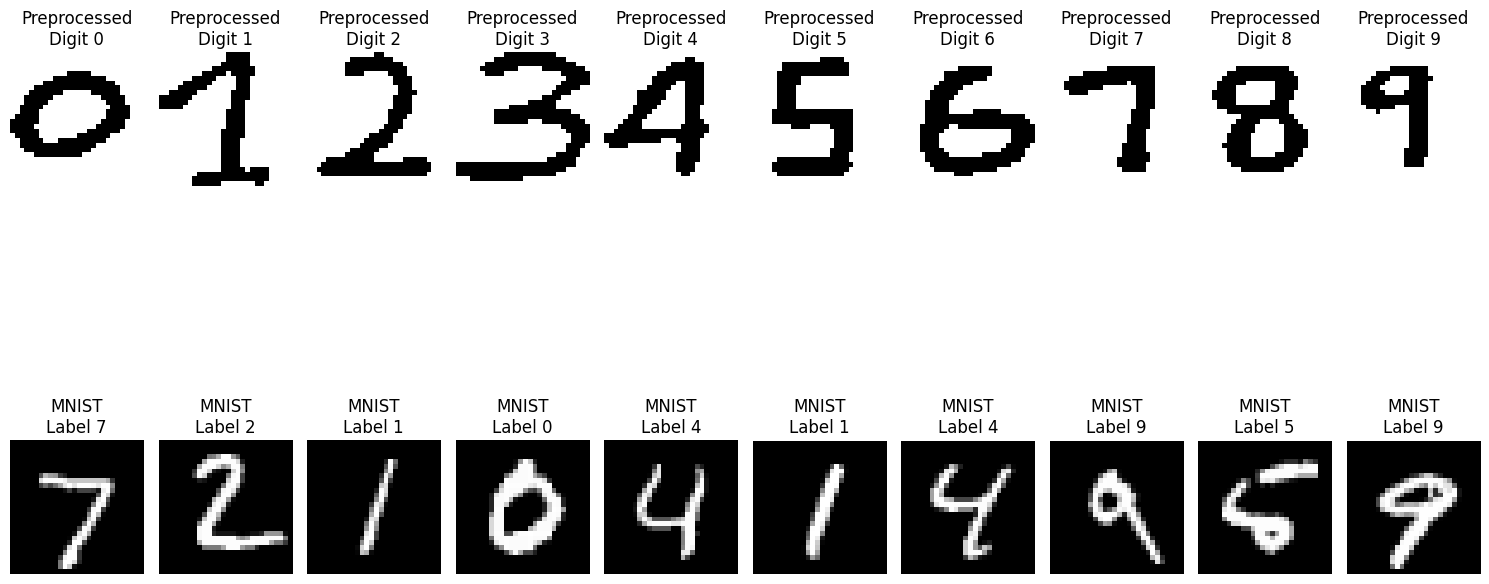

Preprocessed images displayed alongside MNIST test images.


In [ ]:
# Display the preprocessed images side by side with MNIST test images for comparison
from keras.datasets import mnist

# Load some MNIST test images
(_, _), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_test_images = mnist_test_images[:10] / 255.0  # Normalize MNIST images

plt.figure(figsize=(15, 10))
for k in range(len(X_test)):
    # Preprocessed image
    inverted_image = 1 - X_test[k].squeeze()  # Invert colors for visual similarity to MNIST
    img_preprocessed = (inverted_image * 255).astype(np.uint8)  # Scale back to 0-255

    # MNIST image
    mnist_image = mnist_test_images[k]
    mnist_label = mnist_test_labels[k]

    # Display preprocessed image
    plt.subplot(2, 10, k + 1)  # Top row for preprocessed images
    plt.imshow(img_preprocessed, cmap='gray')
    plt.axis('off')
    plt.title(f"Preprocessed\nDigit {k}")

    # Display MNIST image
    plt.subplot(2, 10, 10 + k + 1)  # Bottom row for MNIST images
    plt.imshow(mnist_image, cmap='gray')
    plt.axis('off')
    plt.title(f"MNIST\nLabel {mnist_label}")

plt.tight_layout()
plt.show()
print("Preprocessed images displayed alongside MNIST test images.")


In [ ]:
# Flatten the images to match the model's expected input shape
X_test_flattened = X_test.reshape(X_test.shape[0], -1)  # Flatten to (num_samples, 784)

# Convert labels to one-hot encoding
y_test_categorical = to_categorical(y_test, num_classes=10)

# Print the shapes after transformations
print(f"Shape of X_test after flattening: {X_test_flattened.shape}")
print(f"y_test (original labels): {y_test}")
print("y_test_categorical (one-hot encoded):")
print(y_test_categorical)


Shape of X_test after flattening: (10, 784)
y_test (original labels): [0 1 2 3 4 5 6 7 8 9]
y_test_categorical (one-hot encoded):
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# Evaluate the model and get accuracy
loss, accuracy = model.evaluate(X_test_flattened, y_test_categorical, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Generate predictions on the test set
predictions = model.predict(X_test_flattened).argmax(axis=1)

# Performance Analysis
correct_predictions = np.sum(predictions == y_test)
incorrect_predictions = np.sum(predictions != y_test)
misclassification_rate = (incorrect_predictions / len(y_test)) * 100

print("\nPerformance Analysis:")
print(f"Correct Predictions: {correct_predictions} ({(correct_predictions / len(y_test)) * 100:.2f}%)")
print(f"Incorrect Predictions: {incorrect_predictions} ({misclassification_rate:.2f}%)")


Test Accuracy: 40.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step

Performance Analysis:
Correct Predictions: 4 (40.00%)
Incorrect Predictions: 6 (60.00%)


In [ ]:
# Predict on the test set
predictions = model.predict(X_test_flattened).argmax(axis=1)

# Print predictions and actual labels
for i, (true_label, pred_label) in enumerate(zip(y_test, predictions)):
    print(f"Image {i}: True Label={true_label}, Predicted={pred_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Image 0: True Label=0, Predicted=8
Image 1: True Label=1, Predicted=1
Image 2: True Label=2, Predicted=2
Image 3: True Label=3, Predicted=3
Image 4: True Label=4, Predicted=6
Image 5: True Label=5, Predicted=5
Image 6: True Label=6, Predicted=5
Image 7: True Label=7, Predicted=3
Image 8: True Label=8, Predicted=3
Image 9: True Label=9, Predicted=3


Detected (Correctly Classified) Images:


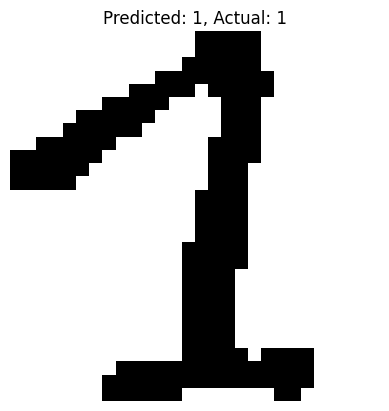

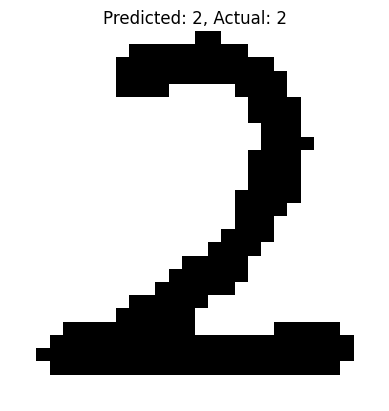

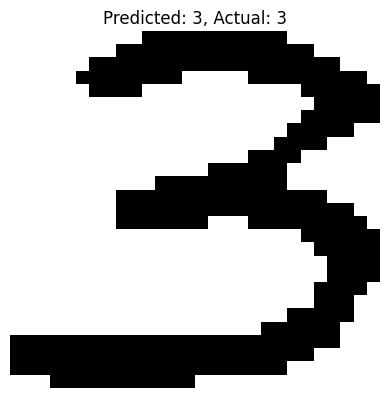

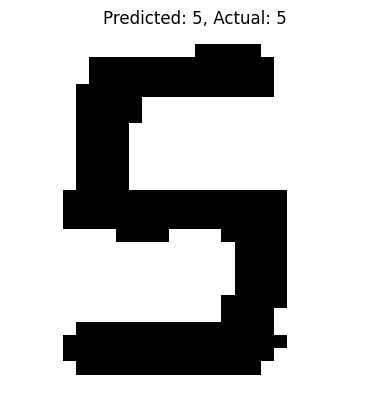

In [ ]:
# Separate detected (correct) predictions
correct_indices = [i for i in range(len(predictions)) if predictions[i] == y_test[i]]

print("Detected (Correctly Classified) Images:")
for i in correct_indices[:10]:  # Display up to 10 correct examples
    plt.imshow(X_test[i].reshape(28, 28), cmap='Greys')
    plt.title(f"Predicted: {predictions[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()


Undetected (Misclassified) Images:


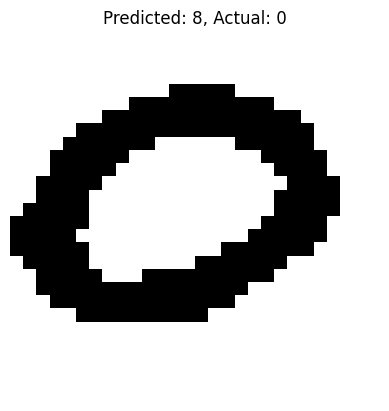

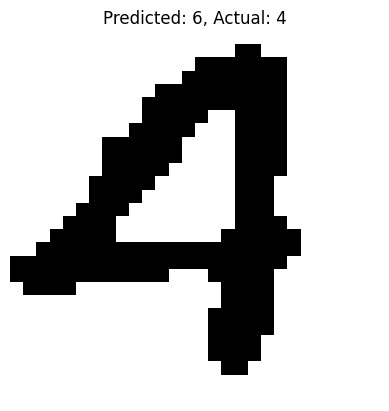

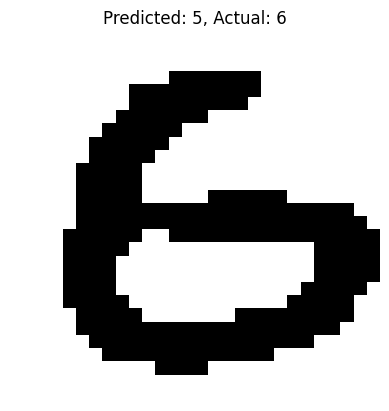

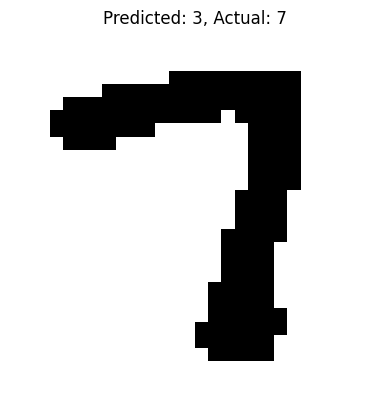

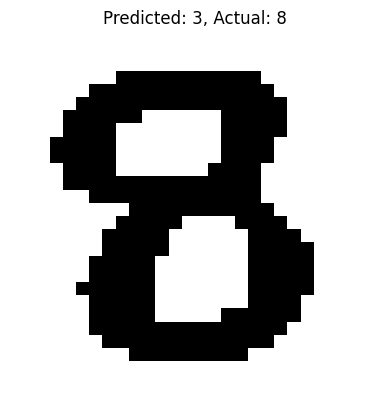

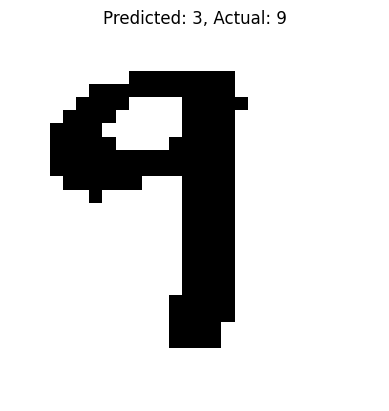

In [ ]:
# Separate undetected (incorrect) predictions
incorrect_indices = [i for i in range(len(predictions)) if predictions[i] != y_test[i]]

print("Undetected (Misclassified) Images:")
for i in incorrect_indices[:10]:  # Display up to 10 incorrect examples
    plt.imshow(X_test[i].reshape(28, 28), cmap='Greys')
    plt.title(f"Predicted: {predictions[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()